<a href="https://colab.research.google.com/github/Pegaxsus/repogaxsus/blob/master/ReconocimientoNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging

In [4]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True) #mnist es un dataset
train_dataset, test_dataset =dataset['train'], dataset['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
class_names =['Cero','Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [9]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [10]:
#Estructura de la red
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),       #capa inicial 784 neuronas, 28x28
	tf.keras.layers.Dense(64, activation=tf.nn.relu),     # 64 neuronas
	tf.keras.layers.Dense(64, activation=tf.nn.relu),     # 64 neuronas
	tf.keras.layers.Dense(10, activation=tf.nn.softmax)   #para clasificacion, capa final
])


In [11]:
#compilación
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

In [12]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32 #tamaño lote
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE) #orden aleatorio de datos de entrenamiento + #tamaño lote
test_dataset = test_dataset.batch(BATCHSIZE) #tamaño lote

#Realizar el aprendizaje
model.fit(
	train_dataset, epochs=5, #vueltas
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE) #No sera necesario pronto
)

Epoch 1/5
1875/1875 [==============================] - 14s 5ms/step - loss: 0.2767 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1242 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0900 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0730 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0574 - accuracy: 0.9822


In [13]:
#Evaluación de nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

313/313 [==============================] - 2s 4ms/step - loss: 0.0878 - accuracy: 0.9749


Resultado en las pruebas:  0.9749000072479248
1/1 [==============================] - 0s 111ms/step


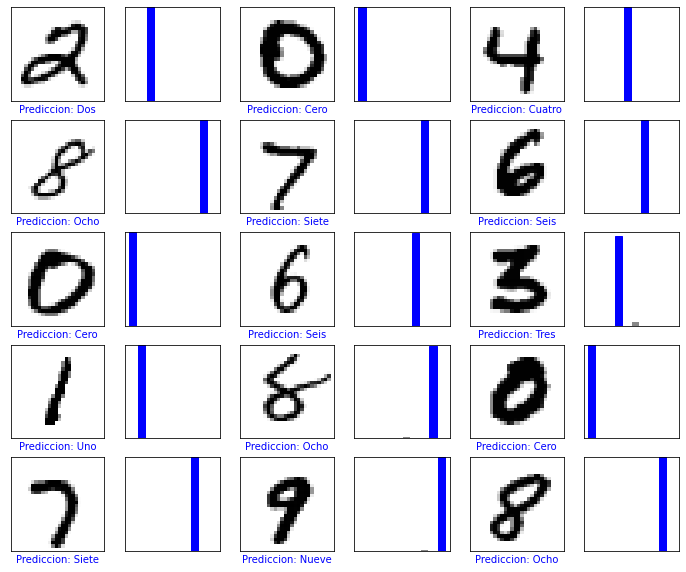

In [14]:
#calidad de las pruebas

print("Resultado en las pruebas: ", test_accuracy)

for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()